In [2]:
# Default란 채무자가 지불 채무를 이행할 수 없는 상태

# Home Credit 은 1997년 체코에서 설립된 국제적인 비은행 금융 기관
# 신용기록이 적거나 전혀 없는 사람들을 대상으로한 대출

# Home Credit은 본 대회를 통해 상환할 수 있는 고객의 대출 신청을 거절하지 않고,
# 고객이 충분히 상환할 수 있는 적절한 원금,
# 만기 및 상환일정을 예측하는 등 데이터의 잠재력을 끌어낼 수 있기를 바란다고 함

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os # File system manangement
import warnings
warnings.filterwarnings('ignore')

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

In [5]:
# 어떤 파일이 있나?
print(os.listdir("/content/drive/MyDrive/Kaggle/home-credit-default-risk"))

['HomeCredit_columns_description.csv', 'application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'previous_application.csv', 'sample_submission.csv']


In [6]:
# train data set
app_train = pd.read_csv('/content/drive/MyDrive/Kaggle/home-credit-default-risk/application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.head(10)

# target 칼럼 포함 122개

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Test data set
app_test = pd.read_csv('/content/drive/MyDrive/Kaggle/home-credit-default-risk/application_test.csv')
print('Testing data shape: ', app_test.shape)
app_test.head()

# doesn't include target -> 121개

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Data EDA

app_train['TARGET'].value_counts()
# 0 = repaid on time
# 1 = had payment difficulties
# 제 때에 갚은 케이스가 훨씬 더 많다

0    282686
1     24825
Name: TARGET, dtype: int64

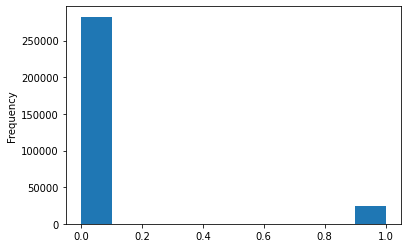

In [9]:
app_train['TARGET'].plot.hist()

# 언밸런스하네. 0이 훨씬 더 많음
# we can weight the classes by their representation in the data to reflect this imbalance.

In [10]:
# 결측치 확인

# app_train.isnull()
print('train data shape :', app_train.shape)
app_train.isnull().sum()

train data shape : (307511, 122)


SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [11]:
def missing_values_table(df) :
  # total missing values
  mis_val = df.isnull().sum()

  # percentage of missing values
  mis_val_percent = 100* df.isnull().sum() / len(df)

  # make a table with the results
  # axis=1은 가로로 합치기
  mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

  # rename the columns
  mis_val_table_ren_columns = mis_val_table.rename(
      columns = {0 : 'Missing values', 1 : '% of Total Values'})
  # pandas DataFrame의 칼럼 이름 바꾸기
  # df.rename(columns = {'old_nm' : 'new_nm'}, inplace = True)
  
  # sort the table by (percentage of missing) descending
  mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] !=0].sort_values('% of Total Values', ascending = False).round(1)
  # iloc[:,1] 은 두번째 열만
  # !=0 은 왜 들어가는 거지?

  # Print some summary information
  print("Your selected df has " + str(df.shape[1]) + " columns.\n"
  "There are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.")
  # app_train.shape[0] -> 307511
  # app_train.shape[1] -> 122

  # return the df with missing information
  return mis_val_table_ren_columns

In [12]:
# Missing values statistics
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected df has 122 columns.
There are 67 columns that have missing values.


,Missing values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [13]:
# When it comes time to build our machine learning models,
# we will have to fill in these missing values (known as imputation).
# In later work, we will use models such as XGBoost that can handle missing values
# with no need for imputation. 
# Another option would be to drop columns
# with a high percentage of missing values, although it is impossible to know ahead of time
# if these columns will be helpful to our model.
# Therefore, we will keep all of the columns for now.

In [14]:
# Column Types
# Let's look at the number of columns of each data type.
# int64 and float64 are numeric variables (which can be either discrete or continuous).
# object columns contain strings and are categorical features. 

# Number of each type of column
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [15]:
# Let's now look at the number of unique entries in each of the object (categorical) columns.

# Number of unique classes in each object column
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

# https://rfriend.tistory.com/267
# pd.Series.nunique에 대한 글
# 예를 들어 name_contract_type은 cash loans, revolving loans의 2가지 밖에 없다

# axis=0은 각 열의 모든 행에 대해서 동작한다.

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [16]:
# Most of the categorical variables have a relatively small number of unique entries.
# We will need to find a way to deal with these categorical variables!

In [17]:
# Encoding Categorical Variables

# in this notebook, we will use
# Label Encoding for any categorical variables with only 2 categories and 
# One-Hot Encoding for any categorical variables with more than 2 categories.

# For label encoding, we use the Scikit-Learn LabelEncoder
# For one-hot encoding, the pandas get_dummies(df) function

# Create a label encoder object
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':

        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:

            # Train on the training data
            # train['col']을 fit
            le.fit(app_train[col])
            
            # Transform both training and testing data
            # train['col']에 따라 encoding
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
# le.fit
# le.transform

3 columns were label encoded.


In [18]:
# one-hot encoding of categorical variables
# One-Hot Encoding for any categorical variables with more than 2 categories.

app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

# 원래는 Training data shape:  (307511, 122)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


In [19]:
# Aligning Training and Testing Data
# There need to be the same features (columns) in both the training and testing data.

# One-hot encoding has created more columns in the training data
# because there were some categorical variables with categories not represented in the testing data.

# ?? train이랑 test df 차이는 'TARGET'뿐 아닌가? 왜 4개나 차이가 나지?

# To remove the columns in the training data that are not in the testing data,
# we need to align the dataframes.
# First we extract the target column from the training data 
# (because this is not in the testing data but we need to keep this information). 
# When we do the align, we must make sure to set axis = 1 to align the dataframes based on 
# the columns and not on the rows!

train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)
# we must make sure to set axis = 1
# to align the dataframes based on the columns and not on the rows!

# 교집합으로 공통된 부분만 추출

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

# The training and testing datasets now have the same features which is required for
# machine learning. The number of features has grown significantly due to one-hot encoding.
# At some point we probably will want to try dimensionality reduction
# (removing features that are not relevant) to reduce the size of the datasets.

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


In [20]:
# Anomalies를 찾아보자

# One problem we always want to be on the lookout for when doing EDA is
# anomalies within the data.

# These may be due to mis-typed numbers, errors in measuring equipment,
# or they could be valid but extreme measurements.

# One way to support anomalies quantitatively is by looking at the statistics of a column
# using the describe method. The numbers in the DAYS_BIRTH column are negative
# because they are recorded relative to the current loan application.
# To see these stats in years,
# we can mutliple by -1 and divide by the number of days in a year:

In [21]:
app_train['DAYS_BIRTH']

0         -9461
1        -16765
2        -19046
3        -19005
4        -19932
          ...  
307506    -9327
307507   -20775
307508   -14966
307509   -11961
307510   -16856
Name: DAYS_BIRTH, Length: 307511, dtype: int64

In [22]:
# The numbers in the DAYS_BIRTH column are negative
# because they are recorded relative to the current loan application

(app_train['DAYS_BIRTH'] / -365).describe()
# Those ages look reasonable. There are no outliers
# for the age on either the high or low end. How about the days of employment?

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [23]:
app_train['DAYS_EMPLOYED'].describe()

# That doesn't look right! The maximum value (besides being positive) is about 1000 years!

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

Text(0.5, 0, 'Days Employment')

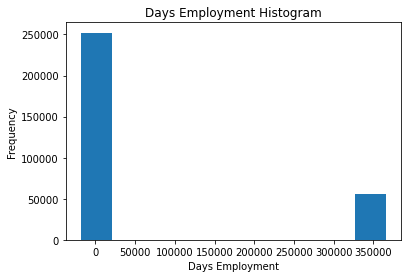

In [24]:
app_train['DAYS_EMPLOYED'].plot.hist(title= 'Days Employment Histogram');
plt.xlabel('Days Employment')

In [25]:
# app_train['DAYS_EMPLOYED'] == 365243
# 이렇게 하면 각 행별로 True, False가 출력된다

app_train[app_train['DAYS_EMPLOYED'] == 365243]
# 이렇게 하면 True인 열 전체가 표시된다

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET
8,100011,0,0,1,0,112500.000,1019610.0,33826.5,913500.0,0.018634,...,0,0,0,0,0,0,0,0,0,0
11,100015,0,0,1,0,38419.155,148365.0,10678.5,135000.0,0.015221,...,0,0,0,0,0,0,0,0,0,0
23,100027,0,0,1,0,83250.000,239850.0,23850.0,225000.0,0.006296,...,0,1,0,0,0,0,0,1,0,0
38,100045,0,0,1,0,99000.000,247275.0,17338.5,225000.0,0.006207,...,0,0,0,0,0,1,0,1,0,0
43,100050,0,0,1,0,108000.000,746280.0,42970.5,675000.0,0.010966,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307469,456209,0,0,1,0,202500.000,703728.0,29943.0,607500.0,0.031329,...,0,0,0,0,0,1,0,1,0,0
307483,456227,0,0,1,0,99000.000,247275.0,16479.0,225000.0,0.007330,...,0,0,0,0,0,1,0,1,0,0
307487,456231,0,0,1,0,117000.000,1071909.0,31473.0,936000.0,0.010147,...,0,0,0,0,0,0,0,0,0,0
307505,456249,0,0,1,0,112500.000,225000.0,22050.0,225000.0,0.022800,...,0,0,0,0,1,0,0,1,0,0


In [26]:
# Just out of curiousity, let's subset the anomalous clients and see if
# they tend to have higher or low rates of default than the rest of the clients.

anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

# interestingly, the anomalies have a lower rate of default.

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


In [27]:
# Handling the anomalies depends on the exact situation, with no set rules.
# One of the safest approaches is just to set the anomalies to a missing value
# and then have them filled in (using Imputation) before machine learning.

# In this case, since all the anomalies have the exact same value,
# we want to fill them in with the same value in case all of these loans share something in common.

# The anomalous values seem to have some importance, so we want to tell the machine learning model
# if we did in fact fill in these values.

# As a solution, we will fill in the anomalous values with not a number (np.nan) 
# and then create a new boolean column indicating whether or not the value was anomalous.

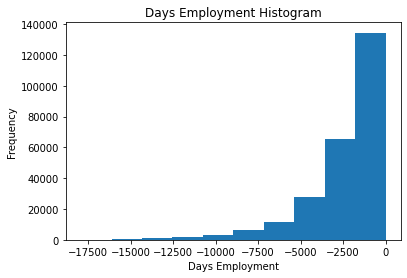

In [28]:
# Line 18

# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

이까지 252줄

In [29]:
# The distribution looks to be much more in line with what we would expect,
# and we also have created a new column to tell the model that these values were originally anomalous
# (becuase we will have to fill in the nans with some value, probably the median of the column).
# The other columns with DAYS in the dataframe look to be about
# what we expect with no obvious outliers.

# As an extremely important note, anything we do to the training data
# we also have to do to the testing data. Let's make sure to create the new column
# and fill in the existing column with np.nan in the testing data.

In [30]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243 : np.nan}, inplace = True)

print('There are %d anomalies in the test date out of %d entries' % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test["DAYS_EMPLOYED_ANOM"])))

There are 9274 anomalies in the test date out of 48744 entries


In [31]:
# Correlations

# Now that we have dealt with the categorical variables and the outliers, let's continue with the EDA.
# One way to try and understand the data is by looking for correlations between the features and the target.
# We can calculate the Pearson correlation coefficient between every variable and the target using the .corr dataframe method.

# The correlation coefficient is not the greatest method to represent "relevance" of a feature,
# but it does give us an idea of possible relationships within the data.
# Some general interpretations of the absolute value of the correlation coefficent are:

# .00-.19 “very weak” .20-.39 “weak” .40-.59 “moderate”
# .60-.79 “strong” .80-1.0 “very strong”

In [32]:
# Correlation

# Find correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values(ascending=False)

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

# days of birth의 correlation이 높다
# The correlation is positive, but the value of this feature is actually negative,
# 그 말은 나이가 들수록, default할 확률이 낮아진다

Most Positive Correlations:
 REGION_POPULATION_RELATIVE             -0.037227
AMT_GOODS_PRICE                        -0.039645
HOUSETYPE_MODE_block of flats          -0.040594
EMERGENCYSTATE_MODE_No                 -0.042201
FLOORSMAX_MODE                         -0.043226
FLOORSMAX_MEDI                         -0.043768
FLOORSMAX_AVG                          -0.044003
ORGANIZATION_TYPE_XNA                  -0.045987
DAYS_EMPLOYED_ANOM                     -0.045987
NAME_INCOME_TYPE_Pensioner             -0.046209
CODE_GENDER_F                          -0.054704
NAME_EDUCATION_TYPE_Higher education   -0.056593
EXT_SOURCE_1                           -0.155317
EXT_SOURCE_2                           -0.160472
EXT_SOURCE_3                           -0.178919
Name: TARGET, dtype: float64

Most Negative Correlations:
 TARGET                                               1.000000
DAYS_BIRTH                                           0.078239
DAYS_EMPLOYED                                        

In [33]:
# 헷갈리니까 ABSOLUTE VALUE로 보자

# Find the correlation of the positive days since birth and target
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

# As the client gets older,
# there is a negative linear relationship with the target meaning that as clients get older,
# they tend to repay their loans on time more often.

-0.07823930830982694

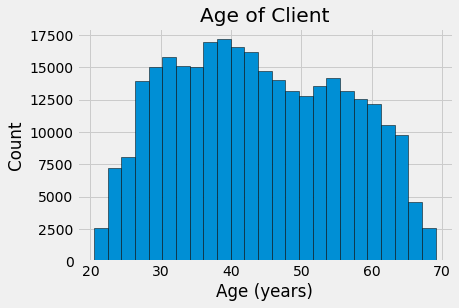

In [34]:
# First, we can make a histogram of the age.
# We will put the x axis in years to make the plot a little more understandable.

# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

By itself, the distribution of age does not tell us much other than that there are no outliers as all the ages are reasonable. To visualize the effect of the age on the target, we will next make a kernel density estimation plot (KDE) colored by the value of the target. A kernel density estimate plot shows the distribution of a single variable and can be thought of as a smoothed histogram (it is created by computing a kernel, usually a Gaussian, at each data point and then averaging all the individual kernels to develop a single smooth curve). We will use the seaborn kdeplot for this graph.

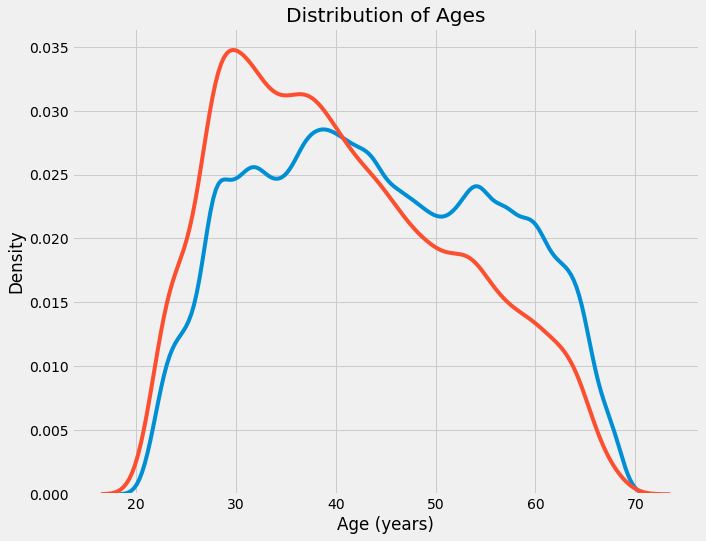

In [35]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
# 제 때에 갚은 사람
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
# 제 때에 못갚은 사람
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

# 왼쪽이 target = 1

The target == 1 curve skews towards the younger end of the range. Although this is not a significant correlation (-0.07 correlation coefficient), this variable is likely going to be useful in a machine learning model because it does affect the target. Let's look at this relationship in another way: average failure to repay loans by age bracket.

To make this graph, first we cut the age category into bins of 5 years each. Then, for each bin, we calculate the average value of the target, which tells us the ratio of loans that were not repaid in each age category.

In [36]:
# Let's look at this relationship in another way: average failure to repay loans by age bracket.
# average failure to repay loans by age bracket.

# Age information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

# linearly spaced = linspace
# start와 stop을 num개의 간격으로

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [37]:
# Group by the bin and calculate averages
age_groups = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


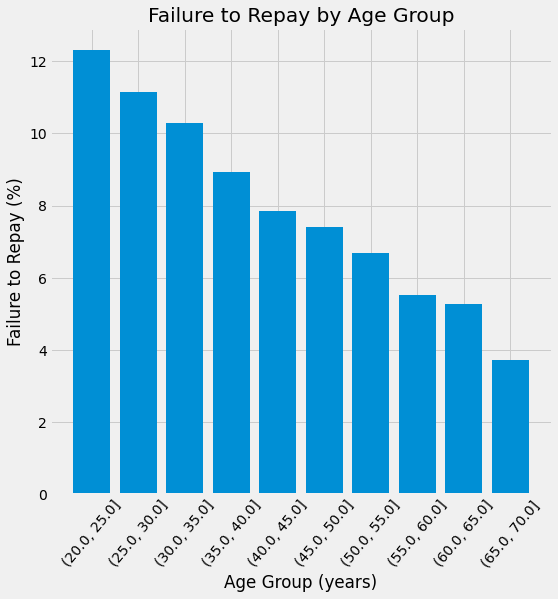

In [38]:
plt.figure(figsize = (8,8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 50); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

There is a clear trend: younger applicants are more likely to not repay the loan! The rate of failure to repay is above 10% for the youngest three age groups and beolow 5% for the oldest age group.

This is information that could be directly used by the bank: because younger clients are less likely to repay the loan, maybe they should be provided with more guidance or financial planning tips. This does not mean the bank should discriminate against younger clients, but it would be smart to take precautionary measures to help younger clients pay on time.

Exterior Sources

The 3 variables with the strongest negative correlations with the target are EXT_SOURCE_1, EXT_SOURCE_2, and EXT_SOURCE_3. According to the documentation, these features represent a "normalized score from external data source". I'm not sure what this exactly means, but it may be a cumulative sort of credit rating made using numerous sources of data.

Let's take a look at these variables.

First, we can show the correlations of the EXT_SOURCE features with the target and with each other.

In [39]:
# Exterior Sources를 살펴보자

print('Most negative correlations : \n', correlations.tail(15))

Most negative correlations : 
 REGION_POPULATION_RELATIVE             -0.037227
AMT_GOODS_PRICE                        -0.039645
HOUSETYPE_MODE_block of flats          -0.040594
EMERGENCYSTATE_MODE_No                 -0.042201
FLOORSMAX_MODE                         -0.043226
FLOORSMAX_MEDI                         -0.043768
FLOORSMAX_AVG                          -0.044003
ORGANIZATION_TYPE_XNA                  -0.045987
DAYS_EMPLOYED_ANOM                     -0.045987
NAME_INCOME_TYPE_Pensioner             -0.046209
CODE_GENDER_F                          -0.054704
NAME_EDUCATION_TYPE_Higher education   -0.056593
EXT_SOURCE_1                           -0.155317
EXT_SOURCE_2                           -0.160472
EXT_SOURCE_3                           -0.178919
Name: TARGET, dtype: float64


In [40]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


In [48]:
# plt.figure(figsize = (8, 6))

# Heatmap of correlations
# sns.heatmap(ext_data_corrs, annot = True)
# plt.title('Correlation Heatmap');

All three EXT_SOURCE featureshave negative correlations with the target, indicating that as the value of the EXT_SOURCE increases, the client is more likely to repay the loan. We can also see that DAYS_BIRTH is positively correlated with EXT_SOURCE_1 indicating that maybe one of the factors in this score is the client age.

Next we can look at the distribution of each of these features colored by the value of the target. This will let us visualize the effect of this variable on the target.

In [49]:
# plt.figure(figsize = (10, 12))

# # iterate through the sources
# for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):

#     # create a new subplot for each source
#     plt.subplot(3, 1, i + 1) # plt.subplot(row,col, index)
#     # plot repaid loans
#     sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
#     # plot loans that were not repaid
#     sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')
    
#     # Label the plots
#     plt.title('Distribution of %s by Target Value' % source)
#     plt.xlabel('%s' % source); plt.ylabel('Density');

# plt.tight_layout(h_pad = 2.5)
# # height pad

EXT_SOURCE_3 displays the greatest difference between the values of the target. We can clearly see that this feature has some relationship to the likelihood of an applicant to repay a loan. The relationship is not very strong (in fact they are all considered very weak, but these variables will still be useful for a machine learning model to predict whether or not an applicant will repay a loan on time.

Feature Engineering

Kaggle competitions are won by feature engineering: those win are those who can create the most useful features out of the data. (This is true for the most part as the winning models, at least for structured data, all tend to be variants on gradient boosting). This represents one of the patterns in machine learning: feature engineering has a greater return on investment than model building and hyperparameter tuning. This is a great article on the subject). As Andrew Ng is fond of saying: "applied machine learning is basically feature engineering."

While choosing the right model and optimal settings are important, the model can only learn from the data it is given. Making sure this data is as relevant to the task as possible is the job of the data scientist (and maybe some automated tools to help us out).

Feature engineering refers to a geneal process and can involve both feature construction: adding new features from the existing data, and feature selection: choosing only the most important features or other methods of dimensionality reduction. There are many techniques we can use to both create features and select features.

We will do a lot of feature engineering when we start using the other data sources, but in this notebook we will try only two simple feature construction methods:

1. Polynomial features
2. Domain knowledge features


1. Polynomial Features

One simple feature construction method is called polynomial features. In this method, we make features that are powers of existing features as well as interaction terms between existing features. For example, we can create variables EXT_SOURCE_1^2 and EXT_SOURCE_2^2 and also variables such as EXT_SOURCE_1 x EXT_SOURCE_2, EXT_SOURCE_1 x EXT_SOURCE_2^2, EXT_SOURCE_1^2 x EXT_SOURCE_2^2, and so on. These features that are a combination of multiple individual variables are called interaction terms because they capture the interactions between variables. In other words, while two variables by themselves may not have a strong influence on the target, combining them together into a single interaction variable might show a relationship with the target. Interaction terms are commonly used in statistical models to capture the effects of multiple variables, but I do not see them used as often in machine learning. Nonetheless, we can try out a few to see if they might help our model to predict whether or not a client will repay a loan.

Jake VanderPlas writes about polynomial features in his excellent book Python for Data Science for those who want more information.

In the following code, we create polynomial features using the EXT_SOURCE variables and the DAYS_BIRTH variable. Scikit-Learn has a useful class called PolynomialFeatures that creates the polynomials and the interaction terms up to a specified degree. We can use a degree of 3 to see the results (when we are creating polynomial features, we want to avoid using too high of a degree, both because the number of features scales exponentially with the degree, and because we can run into problems with overfitting).

In [43]:
# 먼저 polynomial

# Make a new dataframe for polynomial features
poly_features = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import Imputer 하면 실행 안된다!!!
imputer = SimpleImputer(strategy = 'median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)

poly_features_test = imputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures
                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

In [44]:
# Line 41

# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)
print('Polynomial Test Features shape : ', poly_features_test.shape)

Polynomial Features shape:  (307511, 35)
Polynomial Test Features shape :  (48744, 35)


This creates a considerable number of new features. To get the names we have to use the polynomial features get_feature_names method.

In [45]:
poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2']

There are 35 features with individual features raised to powers up to degree 3 and interaction terms. Now, we can see whether any of these new features are correlated with the target.

In [46]:
# Create a dataframe of the features 
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Add in the target
poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: float64
DAYS_BIRTH     -0.078239
DAYS_BIRTH^2   -0.076672
DAYS_BIRTH^3   -0.074273
TARGET          1.000000
1                    NaN
Name: TARGET, dtype: float64


Several of the new variables have a greater (in terms of absolute magnitude) correlation with the target than the original features. When we build machine learning models, we can try with and without these features to determine if they actually help the model learn.

We will add these features to a copy of the training and testing data and then evaluate models with and without the features. Many times in machine learning, the only way to know if an approach will work is to try it out!

In [47]:
#@title
# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Merge polynomial features into training dataframe
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
app_train_poly = app_train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

# Merge polnomial features into testing dataframe
poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
app_test_poly = app_test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

# Align the dataframes
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join = 'inner', axis = 1)

# Print out the new shapes
print('Training data with polynomial features shape: ', app_train_poly.shape)
print('Testing data with polynomial features shape:  ', app_test_poly.shape)

Training data with polynomial features shape:  (307511, 275)
Testing data with polynomial features shape:   (48744, 275)
